# Assignment 7

Create a Linear Regression Model using Python/R to predict home prices.The 
objective is to predict the value of prices of the house using the given features in 
the dataset. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.shape

(506, 14)

In [7]:
df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [8]:
df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [9]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
df = df.fillna(df.mean())

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\sangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

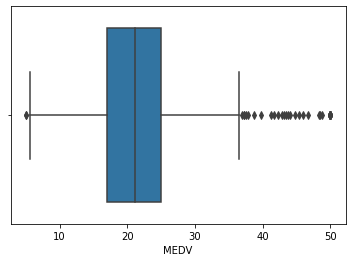

In [13]:
sns.boxplot(df['MEDV'])

In [14]:
#To remove outliers from MEDV 
df = df[~(df['MEDV']>=36.0)]
df.shape

(462, 14)

C:\Users\sangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

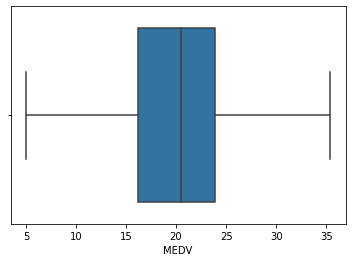

In [15]:
sns.boxplot(df['MEDV'])

<AxesSubplot:>

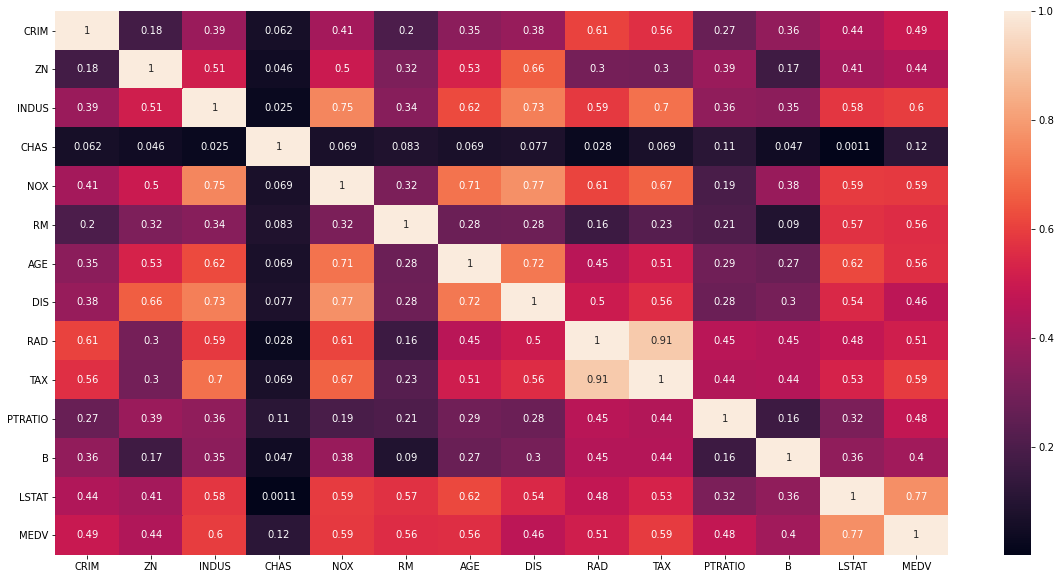

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)

In [17]:
#Apply Normalization Technique
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cols = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=df_cols)

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.058148,0.0,0.314815,0.577505,0.641607,0.268711,0.000000,0.208015,0.287234,1.000000,0.083356,0.625000
1,0.000236,0.00,0.234444,0.0,0.172840,0.547998,0.782698,0.348524,0.043478,0.104962,0.553191,1.000000,0.198944,0.546053
2,0.000236,0.00,0.234444,0.0,0.172840,0.694386,0.599382,0.348524,0.043478,0.104962,0.553191,0.989737,0.056960,0.976974
3,0.000293,0.00,0.053333,0.0,0.150206,0.658555,0.441813,0.448173,0.086957,0.066794,0.648936,0.994276,0.026674,0.934211
4,0.000264,0.00,0.053333,0.0,0.150206,0.549722,0.574665,0.448173,0.086957,0.066794,0.648936,0.992990,0.089747,0.779605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,0.000633,0.00,0.414444,0.0,0.386831,0.580954,0.681771,0.122080,0.000000,0.164122,0.893617,0.987619,0.298289,0.572368
458,0.000438,0.00,0.414444,0.0,0.386831,0.490324,0.760041,0.104691,0.000000,0.164122,0.893617,1.000000,0.197277,0.513158
459,0.000612,0.00,0.414444,0.0,0.386831,0.654340,0.907312,0.093771,0.000000,0.164122,0.893617,1.000000,0.101695,0.621711
460,0.001161,0.00,0.414444,0.0,0.386831,0.619467,0.889804,0.113918,0.000000,0.164122,0.893617,0.991301,0.125035,0.559211


In [19]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
X=df[['LSTAT','RM']]
Y=df['MEDV']

In [21]:
X

,LSTAT,RM
0,0.083356,0.577505
1,0.198944,0.547998
2,0.056960,0.694386
3,0.026674,0.658555
4,0.089747,0.549722
...,...,...
457,0.298289,0.580954
458,0.197277,0.490324
459,0.101695,0.654340
460,0.125035,0.619467


In [22]:
Y

0      0.625000
1      0.546053
2      0.976974
3      0.934211
4      0.779605
         ...   
457    0.572368
458    0.513158
459    0.621711
460    0.559211
461    0.226974
Name: MEDV, Length: 462, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(323, 2)
(139, 2)
(323,)
(139,)


In [25]:
from sklearn.linear_model import LinearRegression
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
Y_train_predict=lin_mod.predict(X_train)
rmse=np.sqrt(mean_squared_error(Y_train,Y_train_predict))
r2=r2_score(Y_train,Y_train_predict)
print("The Model Performance for Training Set")
print('RMSE is {}'.format(rmse))
print('R2_Score is {}'.format(r2))
print('---------------------------------------')
Y_test_predict = lin_mod.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2 = r2_score(Y_test,Y_test_predict)
print("The Model Performance for Testing Set")
print('RMSE is {}'.format(rmse))
print('R2_Score is {}'.format(r2))



The Model Performance for Training Set
RMSE is 0.12960721972594336
R2_Score is 0.6305912018187978
---------------------------------------
The Model Performance for Testing Set
RMSE is 0.13033947424553022
R2_Score is 0.5372171642926253
